# **菊安酱与菜菜的Python机器学习可视化**

## <font color='bule'>第2期 偏差图：14面积图

### 14/50 面积图

面积图就是通过对轴和线之间的区域进行着色形成的一种图形。    
它不仅可以强调峰值与低谷，还可以强调高点和低点的持续时间，持续时间越长，面积就越大。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/%E9%9D%A2%E7%A7%AF%E5%9B%BE.png" align="center" width=600/>

横坐标：时间（月份）<br>
纵坐标：月度收益率<br>
颜色：>0显示绿色，<0显示红色    
注释：收益率最高的点

### 1. 导入需要的绘图库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#如果是jupyter notebook则需要运行这句代码，把生成的png图片嵌入到cell中
#如果是jupyter lab则可以不用运行这句代码，它会自动将生成图片嵌入到cell中

### 2. 认识绘制面积图的函数

#### **plt.fill_between**  

> 函数功能：   
>> 填充两条水平曲线之间区域 

> 重要参数说明：  
>> x: 定义曲线的x坐标   
>> y1: 定义第一条曲线的y坐标  
>> y2: 定义第二条曲线的y坐标    
>> where: 定义被填充的区域   
>> interpolate: 控制交叉点位置的填充（仅在设定where并且两条曲线相交的时候起作用）

官网参数说明：https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html

In [2]:
plt.fill_between?

Signature:
plt.fill_between(
    x,
    y1,
    y2=0,
    where=None,
    interpolate=False,
    step=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*,
*y2*).  This creates one or multiple polygons describing the filled
area.

You may exclude some horizontal sections from filling using *where*.

By default, the edges connect the given points directly.  Use *step*
if the filling should be a step function, i.e. constant in between
*x*.

Parameters
----------
x : array (length N)
    The x coordinates of the nodes defining the curves.

y1 : array (length N) or scalar
    The y coordinates of the nodes defining the first curve.

y2 : array (length N) or scalar, default: 0
    The y coordinates of the nodes defining the second curve.

where : array of bool (length N), optional
    Define *where* to exclude some horizontal regions from being filled.
    The filled regions are defined

### 3.绘制简单面积填充图

In [3]:
#生成随机数
x = np.random.randn(1000)
x.sort()

In [4]:
x[:10]

array([-3.2970297 , -2.82029311, -2.73239795, -2.64356595, -2.56994427,
       -2.47333231, -2.40991642, -2.39667377, -2.37698973, -2.35461316])

In [5]:
y1 = np.sin(x)
y2 = np.cos(x)

In [6]:
y1[:10]

array([ 0.15481189, -0.31579986, -0.39787064, -0.47769288, -0.54101909,
       -0.61962147, -0.66811779, -0.67791218, -0.6922505 , -0.70822406])

In [7]:
y2[:10]

array([-0.98794397, -0.94882582, -0.91744153, -0.8785269 , -0.84101031,
       -0.78490078, -0.74405552, -0.73514289, -0.72165729, -0.70598773])

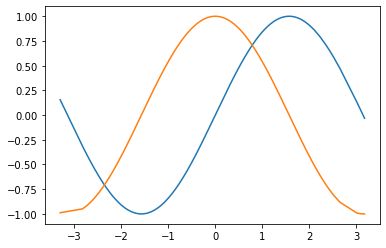

In [8]:
#绘制简单线形图
plt.plot(x,y1)
plt.plot(x,y2);

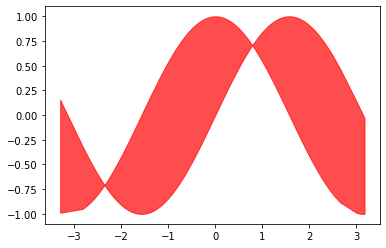

In [11]:
#填充两条曲线之间的区域
plt.fill_between(x,y1,y2,color='r',alpha=.7);

从图中可以发现：两曲线之间的区域全部被填充成一种颜色

增加难度：y1>y2的时候，填充红色，否则填充蓝色

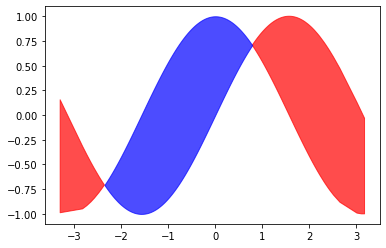

In [12]:
#y1>y2时，填充红色，否则填充蓝色
plt.fill_between(x,y1,y2,where=y1>y2,color='r',alpha=.7,interpolate=True)
plt.fill_between(x,y1,y2,where=y1<=y2,color='b',alpha=.7,interpolate=True);

#注意：interpolate=True表示将计算实际交叉点并将填充区域扩展到此点

#### 如果想要sin(x)>0填充红色，否则填充蓝色，该怎么操作呢？

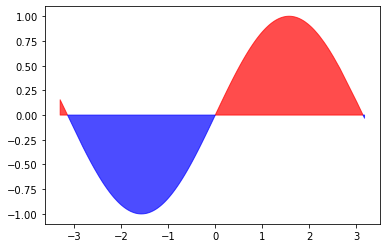

In [13]:
plt.fill_between(x,y1,0,where=y1>0,color='r',alpha=.7,interpolate=True)
plt.fill_between(x,y1,0,where=y1<=0,color='b',alpha=.7,interpolate=True);

### 4.认识绘图数据集

该数据集来自美国经济时间序列数据，是R中的内置数据集，用来练习

In [15]:
#导入数据集
df = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\economics.csv"
                 ,parse_dates=['date'])

#parse_dates的作用是将字符串序列转换为日期序列

In [16]:
df.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    datetime64[ns]
 1   pce       574 non-null    float64       
 2   pop       574 non-null    int64         
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 27.0 KB


In [18]:
df.shape

(574, 6)

#### **将字符串本文转换为日期型文本**

In [21]:
df1 = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\economics.csv")

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    int64  
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 27.0+ KB


方法一：pd.to_datetime()

In [23]:
pd.to_datetime(df1.date)

0     1967-07-01
1     1967-08-01
2     1967-09-01
3     1967-10-01
4     1967-11-01
         ...    
569   2014-12-01
570   2015-01-01
571   2015-02-01
572   2015-03-01
573   2015-04-01
Name: date, Length: 574, dtype: datetime64[ns]

In [24]:
df1['date1']=pd.to_datetime(df1.date)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    int64         
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date1     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 31.5+ KB


方法二：datetime.datetime.strptime()

In [26]:
import datetime

In [40]:
datetime.datetime.strptime('2019-1-1','%Y-%m-%d')

datetime.datetime(2019, 1, 1, 0, 0)

In [41]:
print(datetime.datetime.strptime('2019-1-1','%Y-%m-%d'))

2019-01-01 00:00:00


In [42]:
df1['date2'] = df1['date'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d"))

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    int64         
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date1     574 non-null    datetime64[ns]
 7   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 36.0+ KB


In [44]:
df.columns

Index(['date', 'pce', 'pop', 'psavert', 'uempmed', 'unemploy'], dtype='object')

In [46]:
df.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


In [47]:
name = ['日期','个人消费支出','总人口','个人储蓄率','失业时长中位数','失业人数']

#pce: personal consumption expenditures（ in billions of dollars）个人消费支出
#pop: total population（in thousands）总人口
#psavert: personal savings rate（in month）个人储蓄率
#uempmed：median duration of unemployment（in weeks）失业时长中位数
#unemploy:number of unemployed（in thousands）失业人数

In [48]:
[*zip(df.columns,name)]

[('date', '日期'),
 ('pce', '个人消费支出'),
 ('pop', '总人口'),
 ('psavert', '个人储蓄率'),
 ('uempmed', '失业时长中位数'),
 ('unemploy', '失业人数')]

#### 准备绘图所需数据

绘制目标图形，我们需要的是月度收益率，纵观所有特征，与月度收益率有关的特征是个人储蓄率（psavert）   
而且数据比较多，这里选取前100用来绘图   

In [49]:
df = df[:100]

In [50]:
df.shape

(100, 6)

In [51]:
#提取目标特征
df.psavert.values

array([12.5, 12.5, 11.7, 12.5, 12.5, 12.1, 11.7, 12.2, 11.6, 12.2, 12. ,
       11.6, 10.6, 10.4, 10.4, 10.6, 10.4, 10.9, 10. ,  9.4,  9.9,  9.5,
       10. , 10.9, 11.7, 11.5, 11.5, 11.3, 11.5, 11.7, 11.7, 11.6, 12.3,
       13.3, 12.3, 11.7, 13.2, 13.1, 12.9, 13. , 13.3, 12.9, 13.1, 13.1,
       13.3, 13. , 13.4, 14.4, 13.6, 13.6, 12.9, 13. , 12.8, 12.9, 12.4,
       12.6, 11.5, 11.3, 11.5, 11.4, 11.4, 11.8, 12. , 12.7, 13.4, 13.4,
       12.1, 12.2, 12.4, 12.8, 12.8, 13.2, 12.8, 13.6, 12.8, 14. , 14. ,
       14.4, 14. , 13.8, 13. , 12.7, 12.3, 12.5, 12.7, 11.6, 12.3, 13. ,
       13.4, 13.6, 12.8, 12.1, 12.3, 13.9, 17. , 13.9, 12.3, 12.6, 12.6,
       13. ])

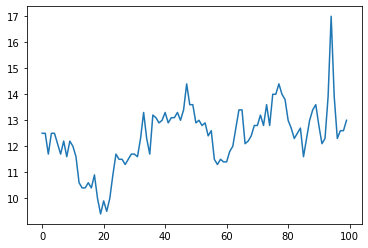

In [52]:
plt.plot(df.psavert.values);

In [53]:
df.psavert.diff()

0     NaN
1     0.0
2    -0.8
3     0.8
4     0.0
     ... 
95   -3.1
96   -1.6
97    0.3
98    0.0
99    0.4
Name: psavert, Length: 100, dtype: float64

In [57]:
#计算收益（本身-前）
income = df.psavert.diff().fillna(0)
income

0     0.0
1     0.0
2    -0.8
3     0.8
4     0.0
     ... 
95   -3.1
96   -1.6
97    0.3
98    0.0
99    0.4
Name: psavert, Length: 100, dtype: float64

In [56]:
df.psavert

0     12.5
1     12.5
2     11.7
3     12.5
4     12.5
      ... 
95    13.9
96    12.3
97    12.6
98    12.6
99    13.0
Name: psavert, Length: 100, dtype: float64

In [55]:
df.psavert.shift(1)

0      NaN
1     12.5
2     12.5
3     11.7
4     12.5
      ... 
95    17.0
96    13.9
97    12.3
98    12.6
99    12.6
Name: psavert, Length: 100, dtype: float64

In [58]:
# 计算月度收益率（收益/本金 = (本身-前)/前）
re = (income/df.psavert.shift(1)).fillna(0)*100

In [59]:
re

0      0.000000
1      0.000000
2     -6.400000
3      6.837607
4      0.000000
        ...    
95   -18.235294
96   -11.510791
97     2.439024
98     0.000000
99     3.174603
Name: psavert, Length: 100, dtype: float64

### 5.绘制目标图形

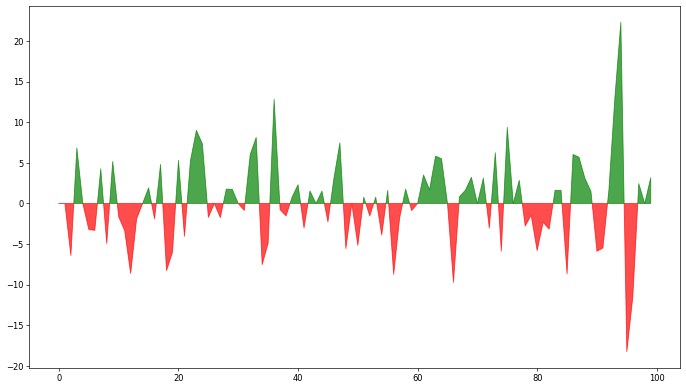

In [60]:
#创建画布并设定画布尺寸
plt.figure(figsize=(14,8),dpi=60)

#绘制面积图
plt.fill_between(range(df.shape[0]),re,0,where=re>0,color='g',interpolate=True, alpha=0.7)
plt.fill_between(range(df.shape[0]),re,0,where=re<=0,color='r',interpolate=True, alpha=0.7);

#### 修改横坐标刻度

In [61]:
#提取年份
y = df.date.dt.year

In [62]:
y

0     1967
1     1967
2     1967
3     1967
4     1967
      ... 
95    1975
96    1975
97    1975
98    1975
99    1975
Name: date, Length: 100, dtype: int64

In [63]:
#提取月份,并且显示英文名字
m = df.date.dt.month_name()

In [64]:
m

0          July
1        August
2     September
3       October
4      November
        ...    
95         June
96         July
97       August
98    September
99      October
Name: date, Length: 100, dtype: object

In [65]:
#将年份和月份打包
[*zip(y,m)]

[(1967, 'July'),
 (1967, 'August'),
 (1967, 'September'),
 (1967, 'October'),
 (1967, 'November'),
 (1967, 'December'),
 (1968, 'January'),
 (1968, 'February'),
 (1968, 'March'),
 (1968, 'April'),
 (1968, 'May'),
 (1968, 'June'),
 (1968, 'July'),
 (1968, 'August'),
 (1968, 'September'),
 (1968, 'October'),
 (1968, 'November'),
 (1968, 'December'),
 (1969, 'January'),
 (1969, 'February'),
 (1969, 'March'),
 (1969, 'April'),
 (1969, 'May'),
 (1969, 'June'),
 (1969, 'July'),
 (1969, 'August'),
 (1969, 'September'),
 (1969, 'October'),
 (1969, 'November'),
 (1969, 'December'),
 (1970, 'January'),
 (1970, 'February'),
 (1970, 'March'),
 (1970, 'April'),
 (1970, 'May'),
 (1970, 'June'),
 (1970, 'July'),
 (1970, 'August'),
 (1970, 'September'),
 (1970, 'October'),
 (1970, 'November'),
 (1970, 'December'),
 (1971, 'January'),
 (1971, 'February'),
 (1971, 'March'),
 (1971, 'April'),
 (1971, 'May'),
 (1971, 'June'),
 (1971, 'July'),
 (1971, 'August'),
 (1971, 'September'),
 (1971, 'October'),
 (

In [66]:
str(m[1])[:3].upper()

'AUG'

In [67]:
#将月份和年份组合成‘JUL-1967’形式
[str(m)[:3].upper()+'-'+str(y) for y,m in zip(y,m)][::6]

['JUL-1967',
 'JAN-1968',
 'JUL-1968',
 'JAN-1969',
 'JUL-1969',
 'JAN-1970',
 'JUL-1970',
 'JAN-1971',
 'JUL-1971',
 'JAN-1972',
 'JUL-1972',
 'JAN-1973',
 'JUL-1973',
 'JAN-1974',
 'JUL-1974',
 'JAN-1975',
 'JUL-1975']

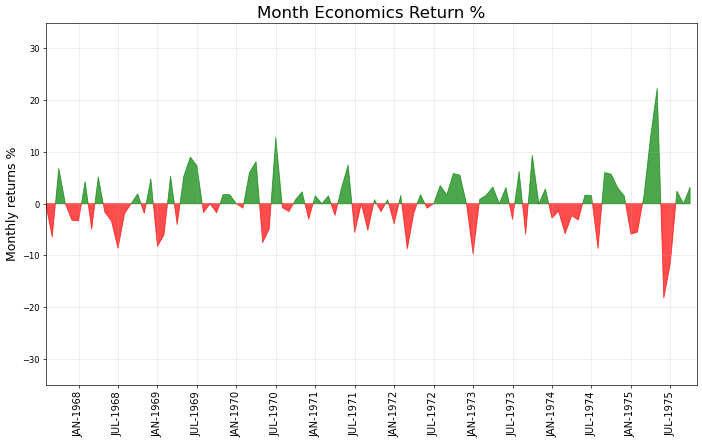

In [68]:
#创建画布并设定画布尺寸
plt.figure(figsize=(14,8),dpi=60)

#绘制面积图
plt.fill_between(range(df.shape[0]),re,0,where=re>0,color='g',interpolate=True, alpha=0.7)
plt.fill_between(range(df.shape[0]),re,0,where=re<=0,color='r',interpolate=True, alpha=0.7)

#修改横坐标刻度
xtickslabel = [str(m)[:3].upper()+'-'+str(y) for y,m in zip(y,m)][::6]
plt.xticks(range(df.shape[0])[::6],xtickslabel,rotation=90,fontsize=12)

#添加装饰
plt.title('Month Economics Return %',fontsize=20)
plt.ylabel('Monthly returns %',fontsize=15)
plt.ylim(-35,35)
plt.xlim(1,100)
plt.grid(alpha=.3);

#### 添加注释

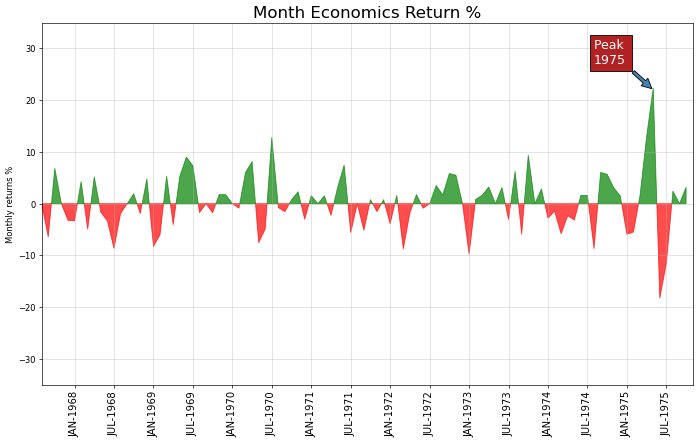

In [69]:
#创建画布并设定画布尺寸
plt.figure(figsize=(14,8),dpi=60)

#绘制面积图
plt.fill_between(range(df.shape[0]),re,0,where=re>0,color='g',interpolate=True, alpha=0.7)
plt.fill_between(range(df.shape[0]),re,0,where=re<=0,color='r',interpolate=True, alpha=0.7)

#添加注释
plt.annotate('Peak \n1975',xy=(94,22),xytext=(85,27)
             ,color='w',fontsize=15
             ,bbox=dict(boxstyle='square',fc='firebrick')
             ,arrowprops=dict(fc='steelblue',shrink=0.05)) 

#添加装饰
plt.title('Month Economics Return %',fontsize=20)
plt.ylabel('Monthly returns %')
#修改横坐标刻度
xticks = [str(m)[:3].upper()+'-'+str(y) for y,m in zip(y,m)][::6]
plt.xticks(range(df.shape[0])[::6],xticks,rotation=90,fontsize=12)
plt.ylim(-35,35)
plt.xlim(1,100)
plt.grid(alpha=.5);

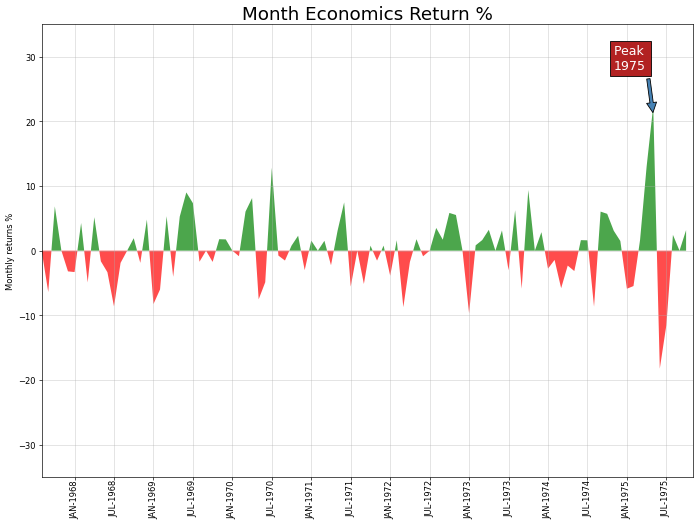

In [70]:
# 源代码
# Prepare Data
df = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\economics.csv", parse_dates=['date']).head(100) #导入数据集并且保留前100行
x = np.arange(df.shape[0]) #生成一个与数据相同长度的序列
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100 #生成绘制图形的目标数据

# Plot
plt.figure(figsize=(14,10), dpi= 60) #创建画布并设定画布大小
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7) #大于0的部分填充为绿色
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7) #小于0的部分填充为红色

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white') #添加注释


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())] #生成X轴标签
plt.gca().set_xticks(x[::6]) #获取当前子图并设定子图的x刻度（每隔6隔保留一个）
#获取当前子图并设定X轴的刻度标签
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35) #设定Y轴的最大最小值
plt.xlim(1,100) #设定X轴的最大最小值
plt.title("Month Economics Return %", fontsize=22) #添加标题
plt.ylabel('Monthly returns %') #添加Y轴标签
plt.grid(alpha=0.5) #配置网格线
plt.show() #本地显示图形

### 6.图像解读